In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [ ]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
!pip install citipy

In [ ]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [2]:
import requests
requests.__version__

'2.22.0'

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10e7f524123d8e0e2291c7012636c5a3


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10e7f524123d8e0e2291c7012636c5a3&q=Boston


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":82.08,"feels_like":81.03,"temp_min":81,"temp_max":82.99,"pressure":1016,"humidity":54},"visibility":10000,"wind":{"speed":10.29,"deg":190},"clouds":{"all":75},"dt":1596383023,"sys":{"type":1,"id":3486,"country":"US","sunrise":1596361095,"sunset":1596412955},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.08,
  'feels_like': 81.03,
  'temp_min': 81,
  'temp_max': 82.99,
  'pressure': 1016,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1596383023,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1596361095,
  'sunset': 1596412955},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.08,
  'feels_like': 81.03,
  'temp_min': 81,
  'temp_max': 82.99,
  'pressure': 1016,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1596383023,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1596361095,
  'sunset': 1596412955},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data["sys"]["country"]

'US'

In [19]:
boston_data["dt"]

1596383023

In [20]:
boston_data["coord"]["lat"]

42.36

In [22]:
boston_data["main"]["temp_max"]

82.99

In [23]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 82.99 54 75 10.29


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 8, 2, 15, 43, 43)

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the City Weather Data

In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [30]:
url = f"http://api.openweathermap.org/data/2.5/weather?unit=Imperial&APPID={weather_api_key}"

http://api.openweathermap.org/data/2.5/weather?unit=Imperial&APPID=10e7f524123d8e0e2291c7012636c5a3


In [44]:
city_data =[]

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    print(i,city)
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = f'{url}&q={city.replace(" ", "+")}'
    
    # Log the url record and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count +=1
     
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
0 kapaa
Processing Record 1 of Set 1 | kapaa
1 hami
Processing Record 2 of Set 1 | hami
2 castro
Processing Record 3 of Set 1 | castro
3 kismayo
Processing Record 4 of Set 1 | kismayo
4 rocha
Processing Record 5 of Set 1 | rocha
5 albany
Processing Record 6 of Set 1 | albany
6 ushuaia
Processing Record 7 of Set 1 | ushuaia
7 moindou
Processing Record 8 of Set 1 | moindou
8 kaitangata
Processing Record 9 of Set 1 | kaitangata
9 isangel
Processing Record 10 of Set 1 | isangel
10 lebu
Processing Record 11 of Set 1 | lebu
11 sorland
Processing Record 12 of Set 1 | sorland
12 bredasdorp
Processing Record 13 of Set 1 | bredasdorp
13 tromso
Processing Record 14 of Set 1 | tromso
14 taolanaro
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
15 yanchukan
Processing Record 16 of Set 1 | yanchukan
City not found. Skipping...
16 liverpool
Processing Record 17 of Set 1 | liverpool
17 juan lacaze
Processing Record 18 of

150 orange park
Processing Record 1 of Set 4 | orange park
151 hasaki
Processing Record 2 of Set 4 | hasaki
152 domasnea
Processing Record 3 of Set 4 | domasnea
153 yanam
Processing Record 4 of Set 4 | yanam
154 sterling
Processing Record 5 of Set 4 | sterling
155 verkhnevilyuysk
Processing Record 6 of Set 4 | verkhnevilyuysk
156 faanui
Processing Record 7 of Set 4 | faanui
157 divnomorskoye
Processing Record 8 of Set 4 | divnomorskoye
158 kodiak
Processing Record 9 of Set 4 | kodiak
159 tual
Processing Record 10 of Set 4 | tual
160 jais
Processing Record 11 of Set 4 | jais
161 nizhneyansk
Processing Record 12 of Set 4 | nizhneyansk
City not found. Skipping...
162 altay
Processing Record 13 of Set 4 | altay
163 saint george
Processing Record 14 of Set 4 | saint george
164 kalevala
Processing Record 15 of Set 4 | kalevala
165 sidhi
Processing Record 16 of Set 4 | sidhi
166 acajutla
Processing Record 17 of Set 4 | acajutla
167 hanna
Processing Record 18 of Set 4 | hanna
168 saleaula
Proc

294 springbok
Processing Record 45 of Set 6 | springbok
295 lolua
Processing Record 46 of Set 6 | lolua
City not found. Skipping...
296 itaquyry
Processing Record 47 of Set 6 | itaquyry
297 leningradskiy
Processing Record 48 of Set 6 | leningradskiy
298 mayo
Processing Record 49 of Set 6 | mayo
299 taiping
Processing Record 50 of Set 6 | taiping
300 bocsa
Processing Record 1 of Set 7 | bocsa
301 constitucion
Processing Record 2 of Set 7 | constitucion
302 usinsk
Processing Record 3 of Set 7 | usinsk
303 patan
Processing Record 4 of Set 7 | patan
304 muroto
Processing Record 5 of Set 7 | muroto
305 solnechnyy
Processing Record 6 of Set 7 | solnechnyy
306 los llanos de aridane
Processing Record 7 of Set 7 | los llanos de aridane
307 ahipara
Processing Record 8 of Set 7 | ahipara
308 tsihombe
Processing Record 9 of Set 7 | tsihombe
City not found. Skipping...
309 rena
Processing Record 10 of Set 7 | rena
310 oktyabrskoye
Processing Record 11 of Set 7 | oktyabrskoye
311 maragogi
Processing

440 mutis
Processing Record 41 of Set 9 | mutis
441 meulaboh
Processing Record 42 of Set 9 | meulaboh
442 sumkino
Processing Record 43 of Set 9 | sumkino
443 bargal
Processing Record 44 of Set 9 | bargal
City not found. Skipping...
444 lorengau
Processing Record 45 of Set 9 | lorengau
445 myitkyina
Processing Record 46 of Set 9 | myitkyina
446 walvis bay
Processing Record 47 of Set 9 | walvis bay
447 tokur
Processing Record 48 of Set 9 | tokur
448 mezen
Processing Record 49 of Set 9 | mezen
449 hobyo
Processing Record 50 of Set 9 | hobyo
450 novosergiyevka
Processing Record 1 of Set 10 | novosergiyevka
451 boulder city
Processing Record 2 of Set 10 | boulder city
452 gejiu
Processing Record 3 of Set 10 | gejiu
453 megion
Processing Record 4 of Set 10 | megion
454 kushnarenkovo
Processing Record 5 of Set 10 | kushnarenkovo
455 shaowu
Processing Record 6 of Set 10 | shaowu
456 znamenskoye
Processing Record 7 of Set 10 | znamenskoye
457 vizinga
Processing Record 8 of Set 10 | vizinga
458 

585 reynosa
Processing Record 36 of Set 12 | reynosa
586 romanovo
Processing Record 37 of Set 12 | romanovo
587 tambo
Processing Record 38 of Set 12 | tambo
588 aleksandriya
Processing Record 39 of Set 12 | aleksandriya
589 pocone
Processing Record 40 of Set 12 | pocone
590 garoua
Processing Record 41 of Set 12 | garoua
591 blonduos
Processing Record 42 of Set 12 | blonduos
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [45]:
len(city_data)

552

In [46]:
city_data

[{'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 298.15,
  'Humidity': 73,
  'Cloudiness': 75,
  'Wind Speed': 7.2,
  'Country': 'US',
  'Date': '2020-08-02 17:07:52'},
 {'City': 'Hami',
  'Lat': 42.8,
  'Lng': 93.45,
  'Max Temp': 302.95,
  'Humidity': 13,
  'Cloudiness': 61,
  'Wind Speed': 3.46,
  'Country': 'CN',
  'Date': '2020-08-02 17:07:52'},
 {'City': 'Castro',
  'Lat': -24.79,
  'Lng': -50.01,
  'Max Temp': 293.22,
  'Humidity': 49,
  'Cloudiness': 2,
  'Wind Speed': 2.82,
  'Country': 'BR',
  'Date': '2020-08-02 17:07:52'},
 {'City': 'Kismayo',
  'Lat': -0.36,
  'Lng': 42.55,
  'Max Temp': 298.52,
  'Humidity': 76,
  'Cloudiness': 7,
  'Wind Speed': 8.12,
  'Country': 'SO',
  'Date': '2020-08-02 17:07:53'},
 {'City': 'Rocha',
  'Lat': -34.48,
  'Lng': -54.33,
  'Max Temp': 291.58,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 2.63,
  'Country': 'UY',
  'Date': '2020-08-02 17:07:53'},
 {'City': 'Albany',
  'Lat': 42.6,
  'Lng': -73.97,
  'Max Temp':

In [47]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,298.15,73,75,7.20,US,2020-08-02 17:07:52
1,Hami,42.80,93.45,302.95,13,61,3.46,CN,2020-08-02 17:07:52
2,Castro,-24.79,-50.01,293.22,49,2,2.82,BR,2020-08-02 17:07:52
3,Kismayo,-0.36,42.55,298.52,76,7,8.12,SO,2020-08-02 17:07:53
4,Rocha,-34.48,-54.33,291.58,81,100,2.63,UY,2020-08-02 17:07:53


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Kapaa,22.08,-159.32,298.15,73,75,7.20,US,2020-08-02 17:07:52
1,1,Hami,42.80,93.45,302.95,13,61,3.46,CN,2020-08-02 17:07:52
2,2,Castro,-24.79,-50.01,293.22,49,2,2.82,BR,2020-08-02 17:07:52
3,3,Kismayo,-0.36,42.55,298.52,76,7,8.12,SO,2020-08-02 17:07:53
4,4,Rocha,-34.48,-54.33,291.58,81,100,2.63,UY,2020-08-02 17:07:53


In [50]:
city_data_df.count()

City_ID       552
City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       548
Date          552
dtype: int64

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [52]:
import time

# Plot Latitude vs. Temperature

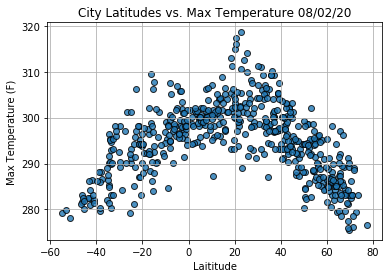

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitudes vs. Max Temperature {time.strftime("%x")}' )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Laititude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

# Plot Latitude vs Humidity

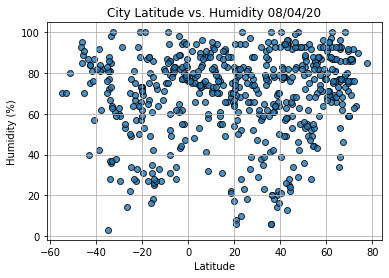

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity {time.strftime("%x")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs. Cloudiness

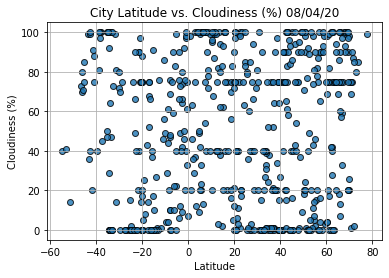

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) {time.strftime("%x")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

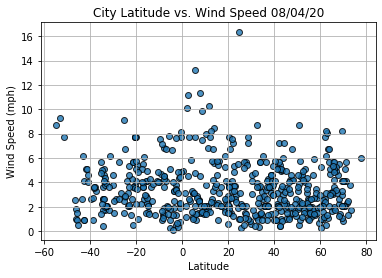

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%x")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()